In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('../train_music.csv', sep =',')
df

,id,target,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,...,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3
0,48104912810,0,7,1514,3,1.0,0,0.496508,0,299.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,13762.315646,1292.468784,NaN
1,4851497268,0,4,896,28,1.0,0,0.881540,0,189.0,...,11.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.000053,NaN
2,4877823097,0,7,592,3,2.0,0,0.811192,0,347.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.000977,NaN
3,4830183791,0,7,1756,3,2.0,0,0.928449,1,343.0,...,66.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.006680,NaN
4,48103940036,0,4,1057,28,1.0,0,0.578654,0,355.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.002487,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,4819141039,0,7,812,3,2.0,0,0.963514,0,357.0,...,65.0,0.0,0.0,0.0,0.0,NaN,NaN,815.758405,54.737625,NaN
69996,4888452526,0,7,1057,3,1.0,1,0.777850,0,364.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
69997,4812460312,0,7,745,3,2.0,0,0.980984,0,363.0,...,54.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
69998,4890036665,0,7,56,3,1.0,0,0.770969,0,341.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1832.938670,72.373650,NaN


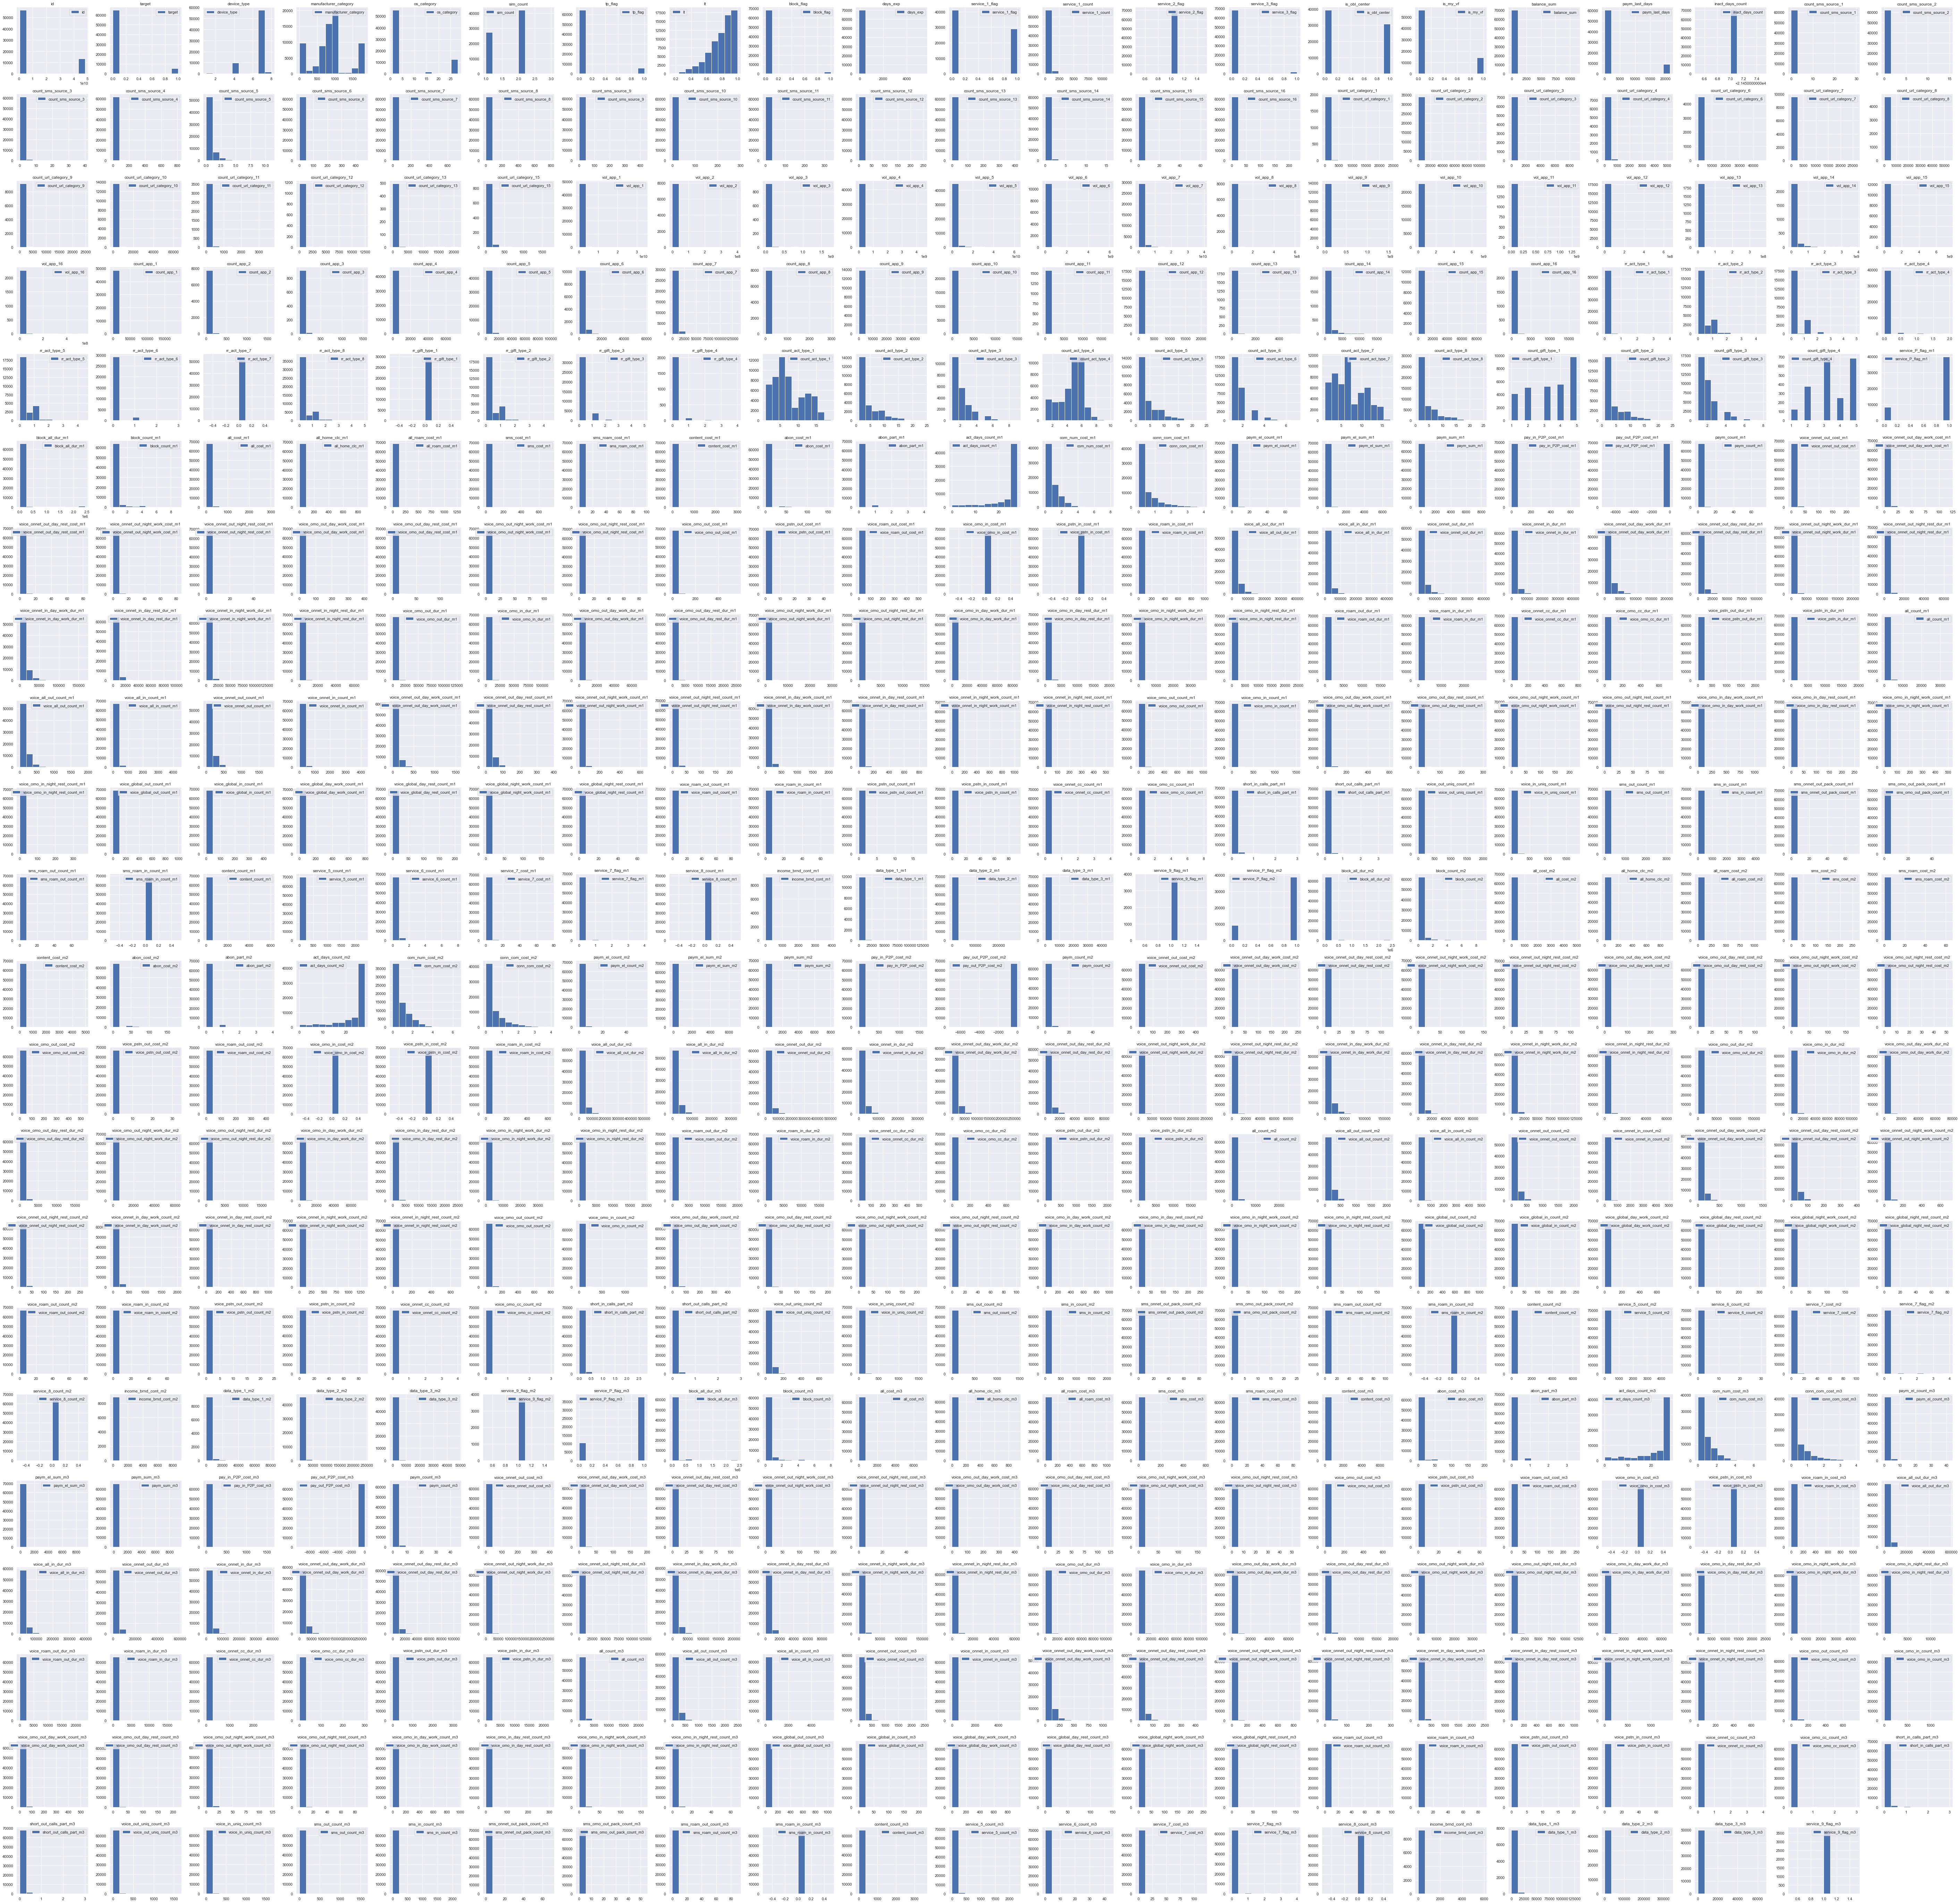

In [47]:
hist = df.loc[(~df['target'].isna())].hist(bins=10, figsize=(100, 100), legend=True)

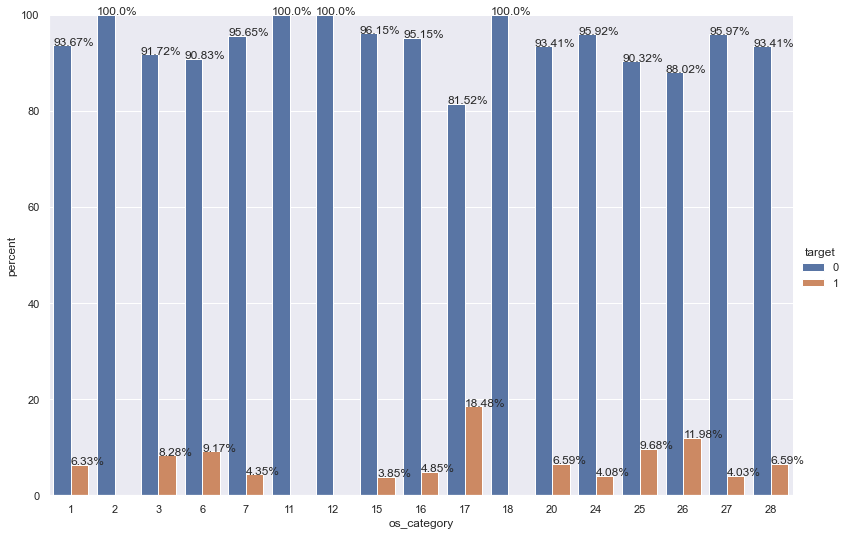

In [27]:
df1 = df.groupby('os_category')['target'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = 'os_category', y = 'percent', hue = 'target', kind = 'bar', data = df1, height = 7.5, aspect = 1.5)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

# количество использование в приложение apple

In [69]:
def make_plott(x,y,df, size= 1.5):
    df1 = df.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x = x, y = 'percent', hue = y, kind = 'bar', data = df1, height = 7.5, aspect = size)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)

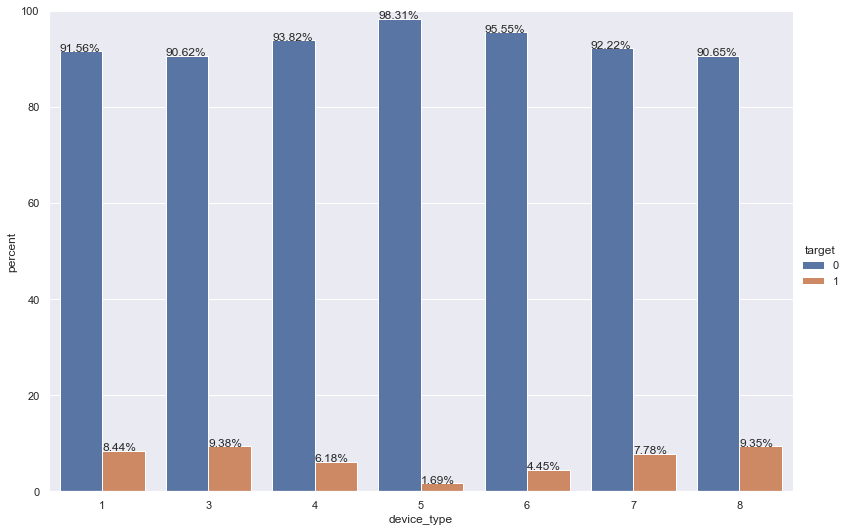

In [64]:
make_plott('device_type', 'target', df)

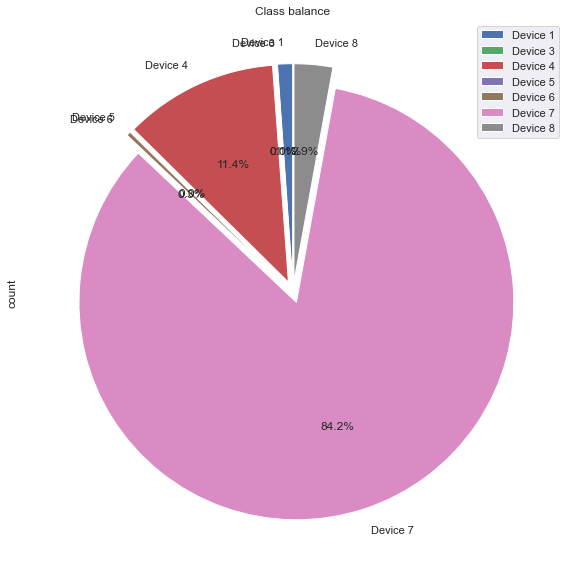

In [93]:
figure, ax = plt.subplots(figsize=(10, 10))

ax.set_title("Class balance")
pd.DataFrame(
    {'count': [df[df['device_type'] == 1]['target'].isin([1]).sum(),
               df[df['device_type'] == 2]['target'].isin([1]).sum(),
               df[df['device_type'] == 3]['target'].isin([1]).sum(),
               df[df['device_type'] == 4]['target'].isin([1]).sum(),
               df[df['device_type'] == 5]['target'].isin([1]).sum(),
               df[df['device_type'] == 6]['target'].isin([1]).sum(),
               df[df['device_type'] == 7]['target'].isin([1]).sum(),
               df[df['device_type'] == 8]['target'].isin([1]).sum()
               ]},
    index=['Device 1',
           'Device 2',
           'Device 3',
           'Device 4',
           'Device 5',
           'Device 6',
           'Device 7',
           'Device 8'
           ]
).plot.pie(subplots=True, figsize=(8, 8), autopct='%1.1f%%', shadow=False, startangle=90, explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05), ax=ax)

plt.show()

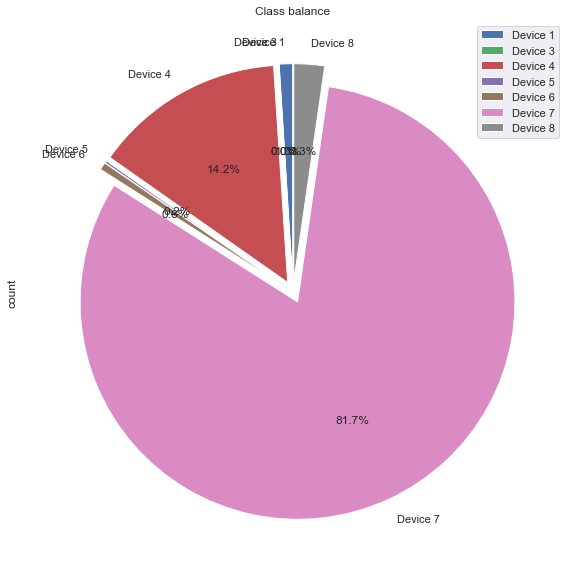

In [94]:
figure, ax = plt.subplots(figsize=(10, 10))

ax.set_title("Class balance")
pd.DataFrame(
    {'count': [df[df['device_type'] == 1]['target'].isin([0]).sum(),
               df[df['device_type'] == 2]['target'].isin([0]).sum(),
               df[df['device_type'] == 3]['target'].isin([0]).sum(),
               df[df['device_type'] == 4]['target'].isin([0]).sum(),
               df[df['device_type'] == 5]['target'].isin([0]).sum(),
               df[df['device_type'] == 6]['target'].isin([0]).sum(),
               df[df['device_type'] == 7]['target'].isin([0]).sum(),
               df[df['device_type'] == 8]['target'].isin([0]).sum()
               ]},
    index=['Device 1',
           'Device 2',
           'Device 3',
           'Device 4',
           'Device 5',
           'Device 6',
           'Device 7',
           'Device 8'
           ]
).plot.pie(subplots=True, figsize=(8, 8), autopct='%1.1f%%', shadow=False, startangle=90, explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05), ax=ax)

plt.show()

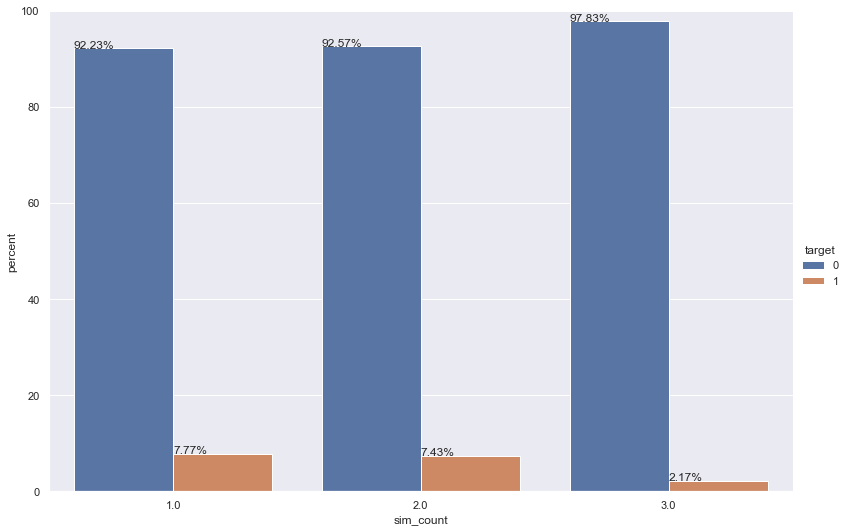

In [65]:
make_plott('sim_count', 'target', df)

<AxesSubplot:xlabel='act_days_count_m3', ylabel='lt'>

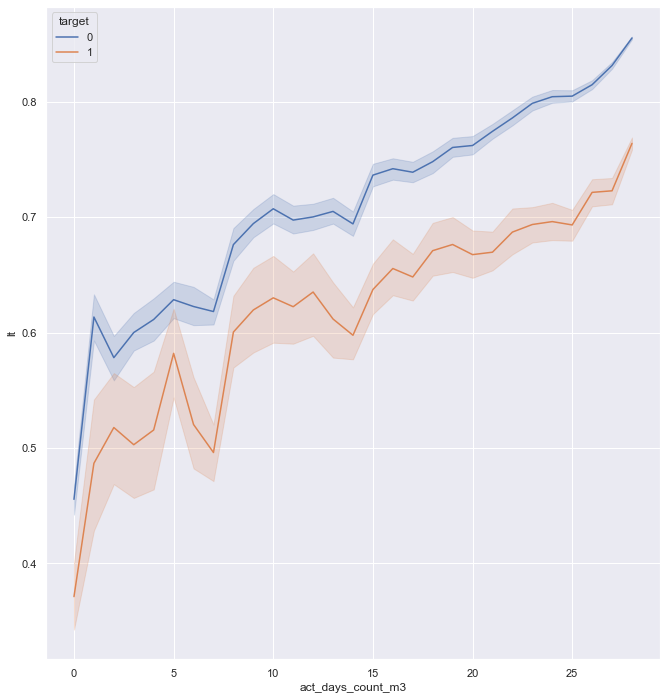

In [66]:
sns.lineplot(data=df, x="act_days_count_m3", y="lt", hue="target")

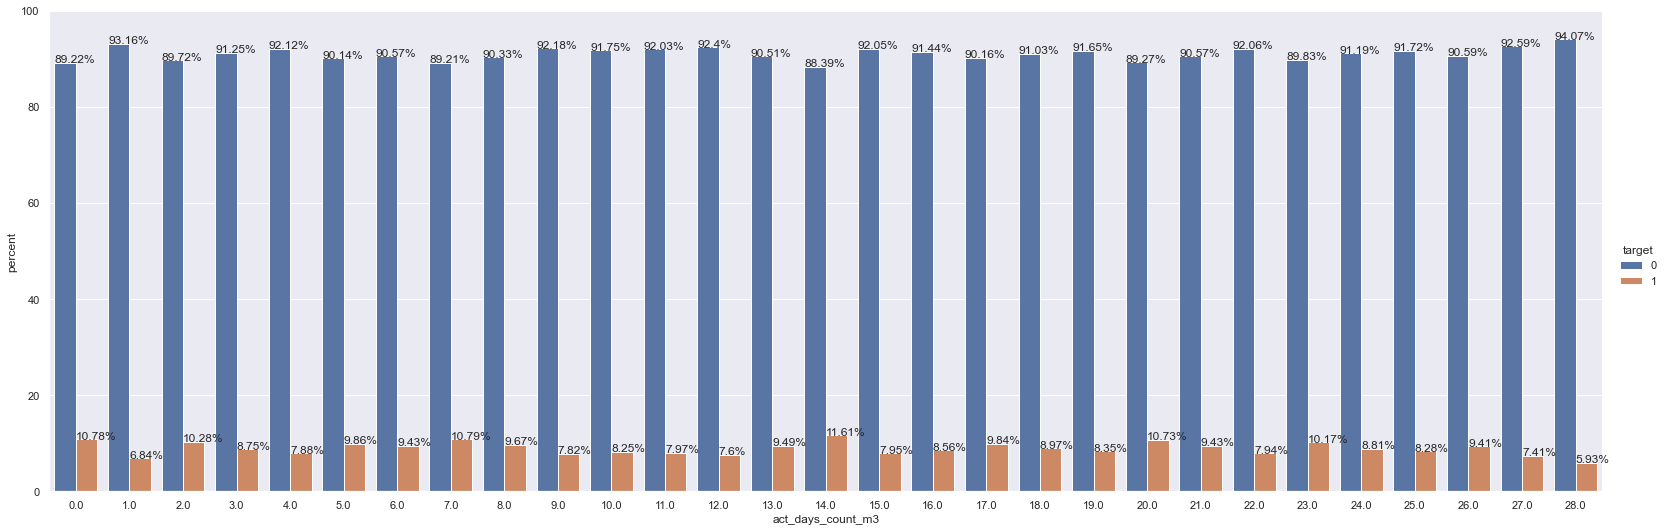

In [70]:
make_plott('act_days_count_m3', 'target', df, size=3)

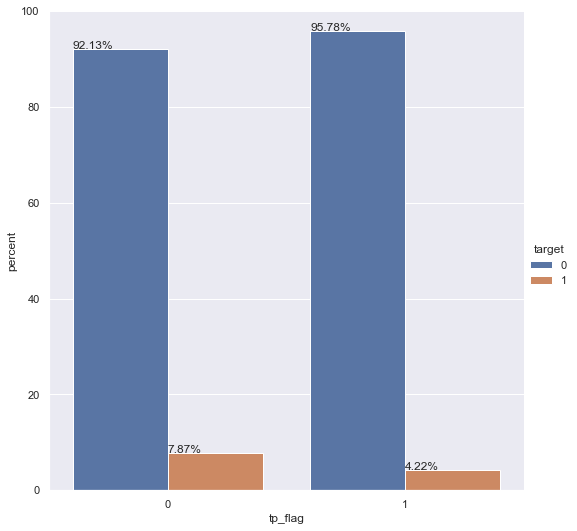

In [72]:
make_plott('tp_flag', 'target', df,size=1)

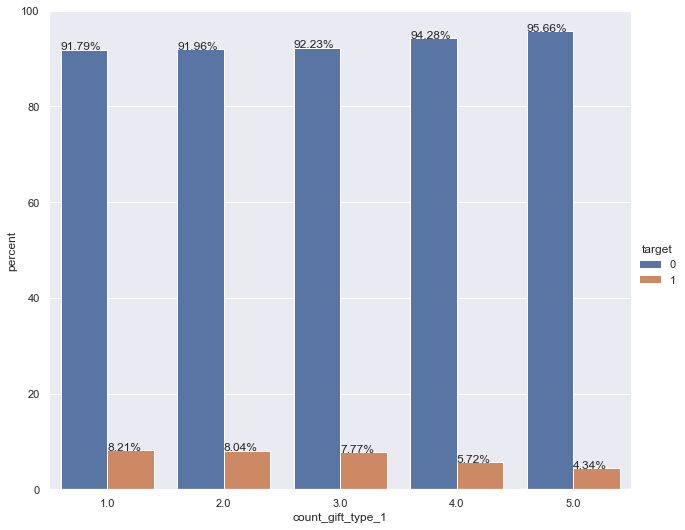

In [73]:
make_plott('count_gift_type_1', 'target', df,size=1.2)

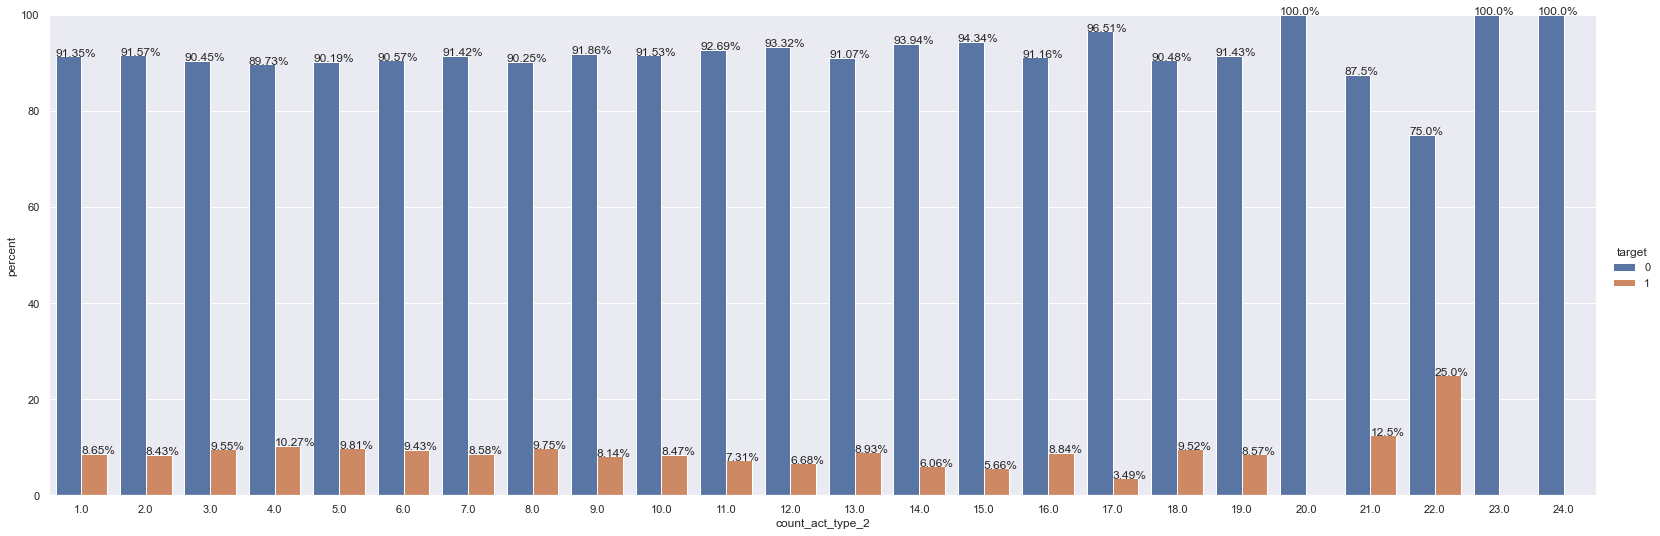

In [75]:
make_plott('count_act_type_2', 'target', df,size=3)

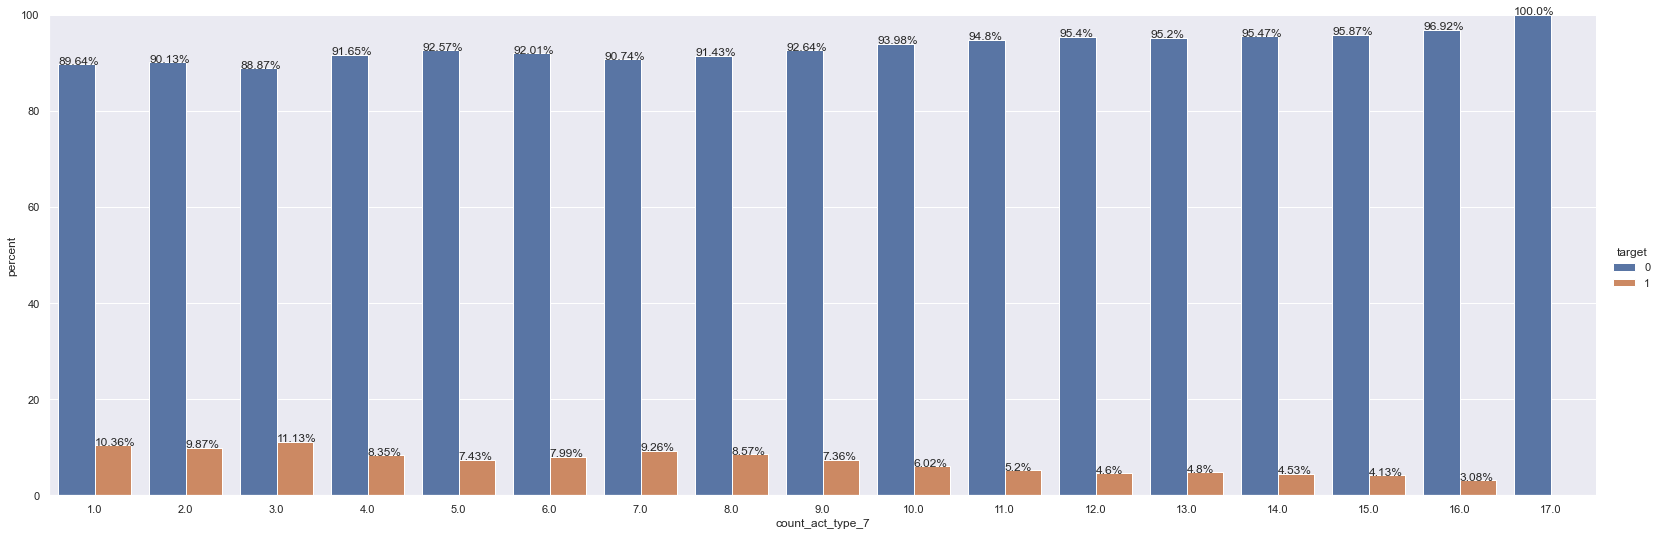

In [77]:
make_plott('count_act_type_7', 'target', df,size=3)

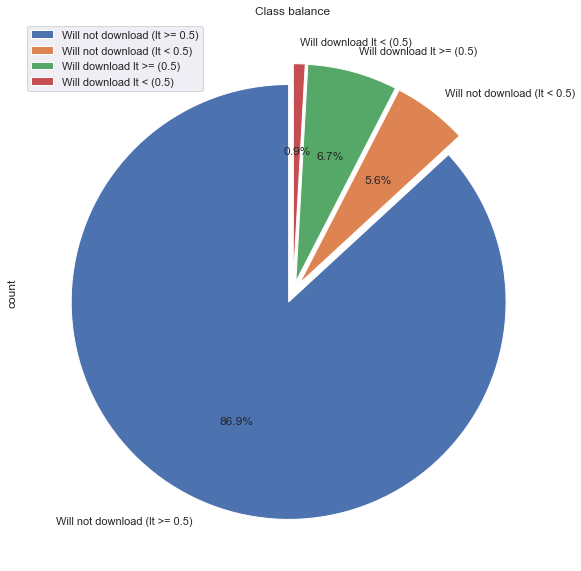

In [86]:
figure, ax = plt.subplots(figsize=(10, 10))

ax.set_title("Class balance")
a = 0.5
pd.DataFrame(
    {'count': [df[df['lt'] >= a]['target'].isin([0]).sum(),
               df[df['lt'] < a]['target'].isin([0]).sum(),
               df[df['lt'] >= a]['target'].isin([1]).sum(),
               df[df['lt'] < a]['target'].isin([1]).sum()
               ]},
    index=['Will not download (lt >= 0.5)',
           'Will not download (lt < 0.5)',
           'Will download lt >= (0.5)',
           'Will download lt < (0.5)']
).plot.pie(subplots=True, figsize=(8, 8), autopct='%1.1f%%', shadow=False, startangle=90, explode=(0.05, 0.05, 0.05, 0.05), ax=ax)

plt.show()

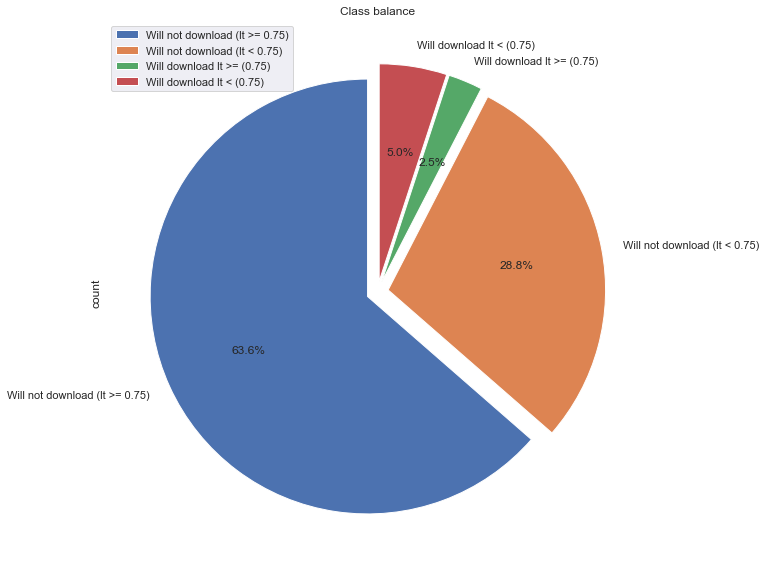

In [88]:
figure, ax = plt.subplots(figsize=(10, 10))

ax.set_title("Class balance")
a = 0.75
pd.DataFrame(
    {'count': [df[df['lt'] >= a]['target'].isin([0]).sum(),
               df[df['lt'] < a]['target'].isin([0]).sum(),
               df[df['lt'] >= a]['target'].isin([1]).sum(),
               df[df['lt'] < a]['target'].isin([1]).sum()
               ]},
    index=['Will not download (lt >= 0.75)',
           'Will not download (lt < 0.75)',
           'Will download lt >= (0.75)',
           'Will download lt < (0.75)']
).plot.pie(subplots=True, figsize=(8, 8), autopct='%1.1f%%', shadow=False, startangle=90, explode=(0.05, 0.05, 0.05, 0.05), ax=ax)

plt.show()